In [5]:
from colors import cmap, heterocycles_colors
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np

# autoreload imports
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df = pd.read_csv(".temp/data/compas-2x.csv", index_col=0).query('charge == 0')

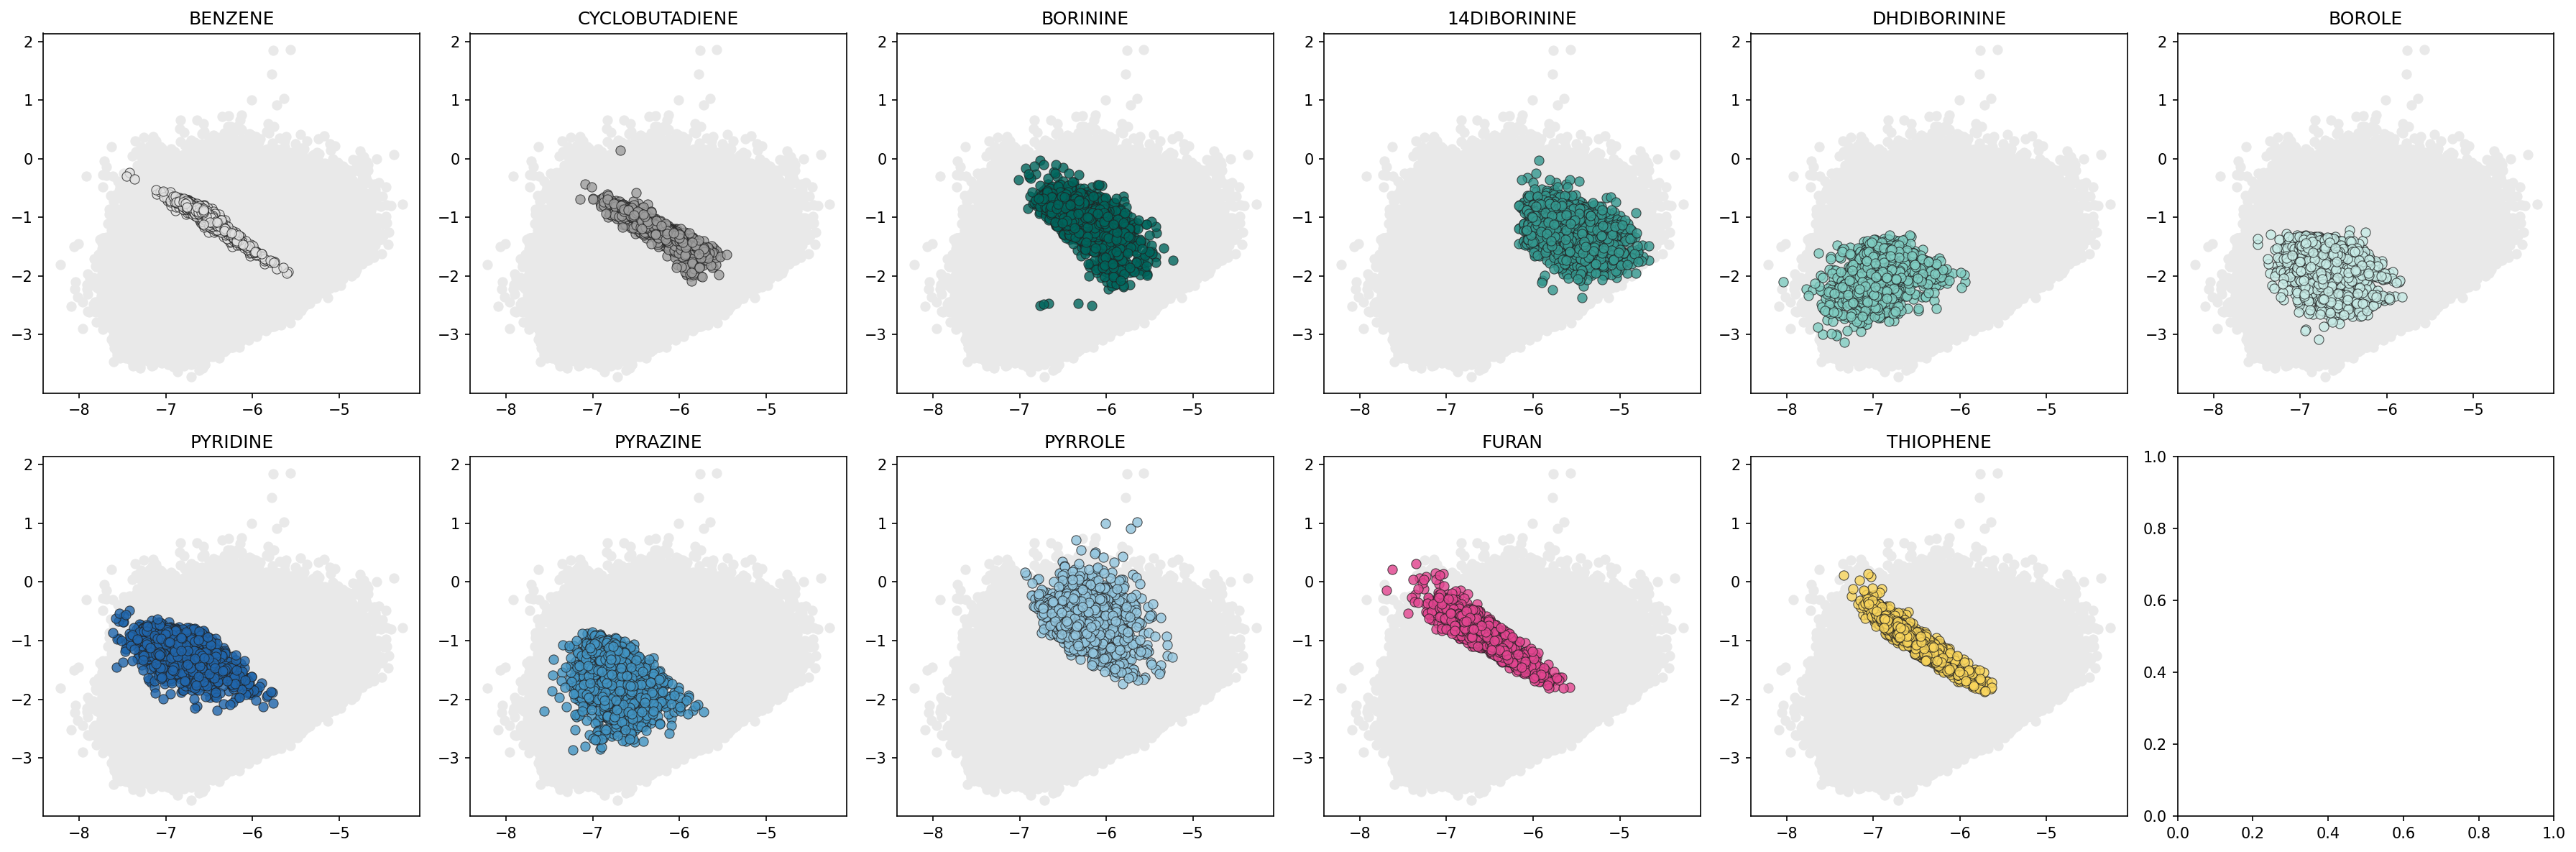

In [12]:
def get_query(bblock):
    query = "benzene != 0 "
    for ring in heterocycles_colors.keys():
        if ring == "benzene": continue
        if ring == bblock: 
            query += f"& `{ring}` != 0 "
            continue
        query += f"& `{ring}` == 0 "
    return query

# make a grid plot for each properties n_cols = 6, infer n_rows
n_cols = 6
n_rows = int(np.ceil(len(heterocycles_colors) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=150,)
axes = axes.flatten()

for i, (ring, color) in enumerate(heterocycles_colors.items()):
    sns.scatterplot(data=df,
                    x='homo_corr',y='lumo_corr',
                    s=40,
                    color="#E9E9E9",
                    edgecolor=None,
                    ax=axes[i])
    sns.scatterplot(data=df.query(get_query(ring)),
                    x='homo_corr',y='lumo_corr',s=40,color=color,
                    edgecolor='#212121',
                    alpha=0.8,
                    ax=axes[i] )
    # remove axis 
    # axes[i].set_xlim([-8, -4])
    # axes[i].set_ylim([-4, 1])
    # show only three tickts
    # axes[i].set_xticks([-8, -6, -4]) 
    # axes[i].set_yticks([-4, -2, 0])
    #set title 
    axes[i].set_title(ring.upper())
    # show interger ticks
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))    
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))    
    # # set axis off
    # axes[i].set_axis_off()
    # hide labels
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()

In [17]:
df[['cyclobutadiene', 'pyrrole', 'borole', 'furan', 'thiophene',
       'dhdiborinine', '14diborinine', 'pyrazine', 'pyridine', 'borinine',
       'benzene', 'h', 'c', 'b', 's', 'o', 'n']] = df[['cyclobutadiene', 'pyrrole', 'borole', 'furan', 'thiophene',
       'dhdiborinine', '14diborinine', 'pyrazine', 'pyridine', 'borinine',
       'benzene', 'h', 'c', 'b', 's', 'o', 'n']].astype(int)

In [18]:
from colors import cmap

In [28]:
uniques = df[hue].unique()
uniques.sort()
uniques[2:]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

C:\Users\eduardo.mayo\AppData\Local\Temp\ipykernel_37128\3647019307.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\eduardo.mayo\AppData\Local\miniconda3\envs\chem_lab\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\eduardo.mayo\AppData\Local\miniconda3\envs\chem_lab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


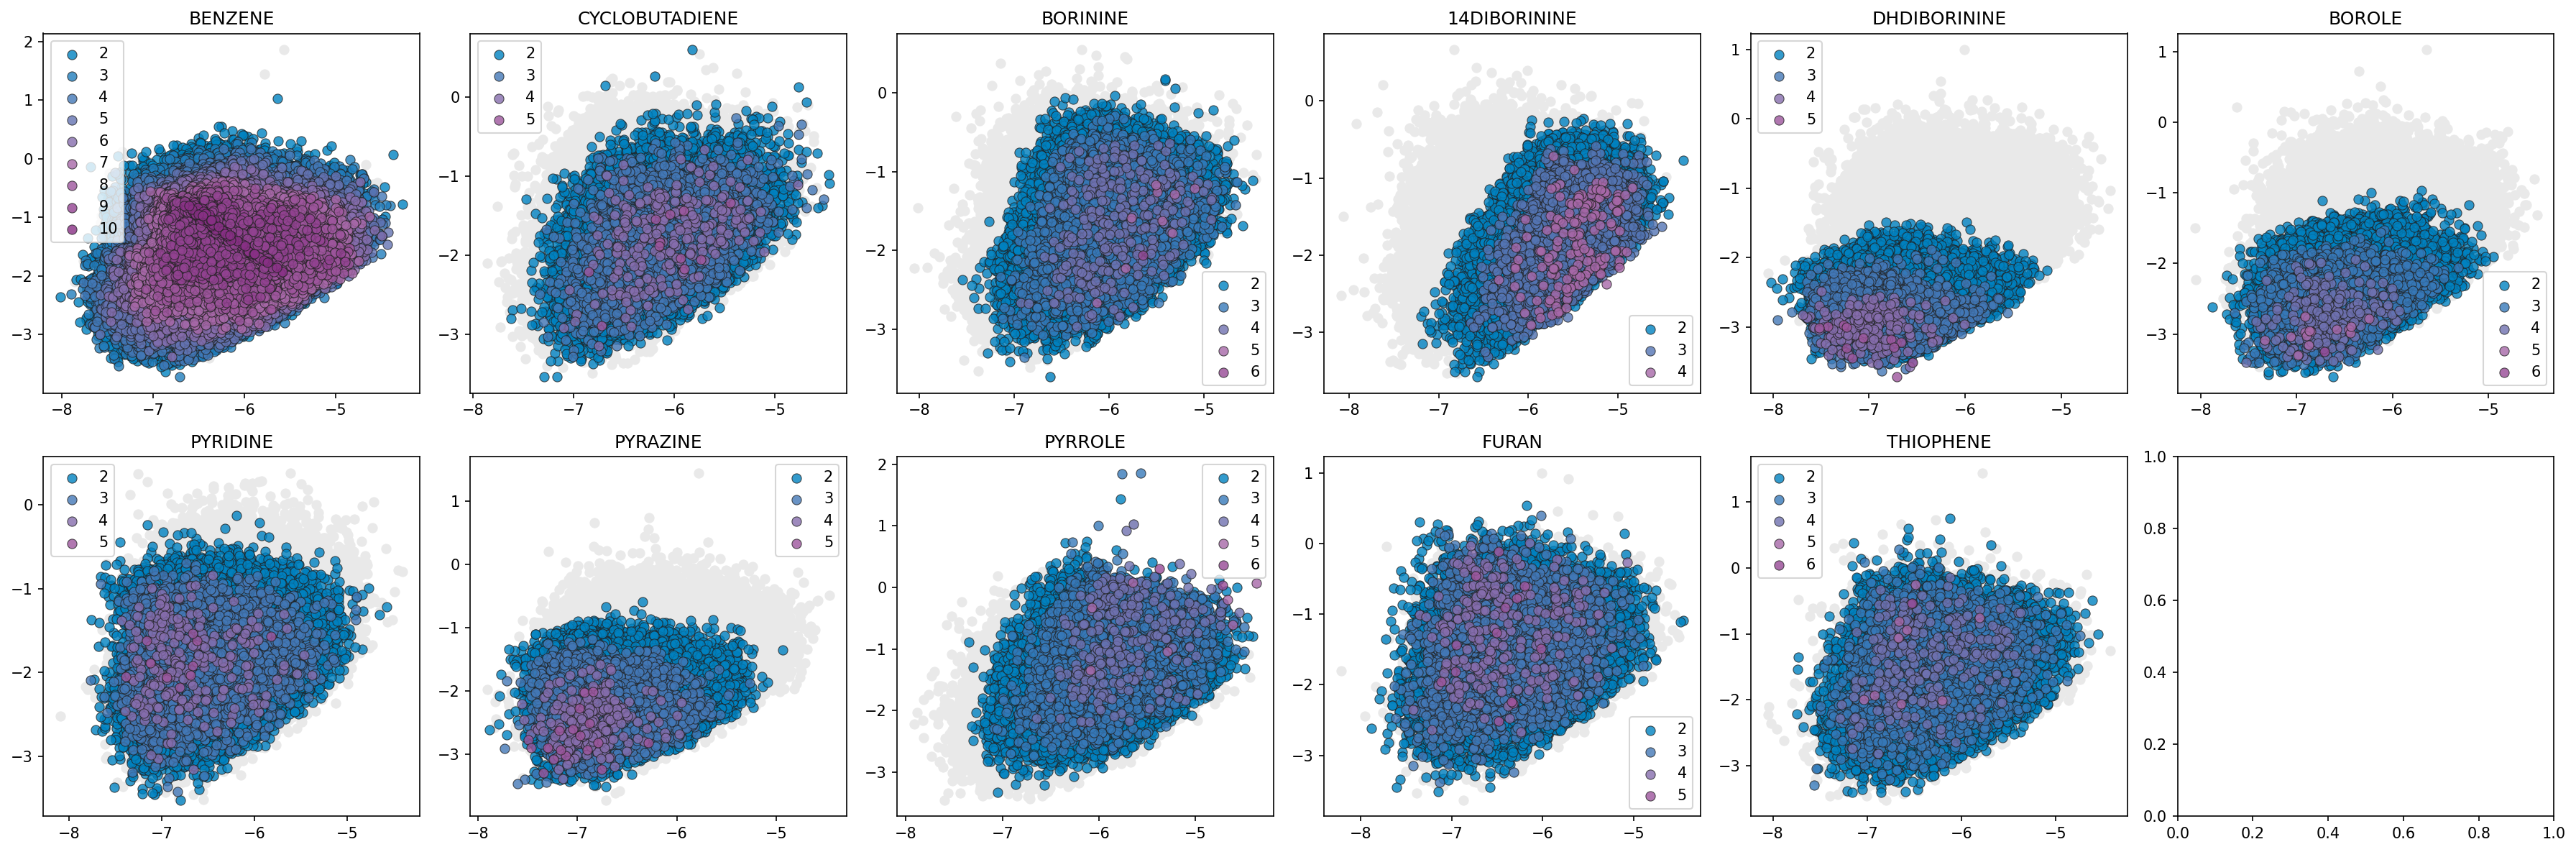

In [46]:
# make a grid plot for each properties n_cols = 6, infer n_rows
n_cols = 6
n_rows = int(np.ceil(len(heterocycles_colors) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=150,)
axes = axes.flatten()

for i, (ring, _) in enumerate(heterocycles_colors.items()):
   sns.scatterplot(data=df.sample(50000),
               x='homo_corr',y='lumo_corr',
               s=40,
               color="#E9E9E9",
               edgecolor=None,
               ax=axes[i])
   # get the range of the rings count
   uniques = df[ring].unique()
   uniques.sort()
   # set the minimum number of ring to 2
   uniques = uniques[2:]
   # get the min and max to center the cmap
   cmap_min = uniques[0]
   cmap_max = uniques[-1]
   # Scatter plot of the molecules with a given
   # number of rings. Iterate over all of them and 
   # overlay them from fewer to a larger number of rings.
   for h_count in uniques:
      sns.scatterplot(data=df.query(f'`{ring}` == {h_count}'),
                     x='homo_corr',y='lumo_corr',
                     s=40,
                     color=cmap((h_count-cmap_min)/cmap_max)[:3],
                     edgecolor='#212121',
                     alpha=0.8,
                     ax=axes[i],
                     label=str(h_count))
   axes[i].set_title(ring.upper())
   # show interger ticks
   axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))    
   axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))    
   # # set axis off
   # axes[i].set_axis_off()
   # hide labels
   axes[i].set_xlabel('')
   axes[i].set_ylabel('')
plt.tight_layout()